In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List

from sklearn.cluster import KMeans

from scripts.utils import load_binary_from_eleven_sandstones

/home/pedro2/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# Loading data

data_dir = project_root + "/data"
data_paths = [data for data in os.listdir(data_dir) if data.endswith(".raw")]
data_dict = {name[:-4]: load_binary_from_eleven_sandstones(data_dir + "/" + name) for name in data_paths}
data_names = list(data_dict.keys())
pd.Series(data_names)

0    Parker_2d25um_grayscale_filtered
1             Parker_2d25um_grayscale
2                Parker_2d25um_binary
dtype: object

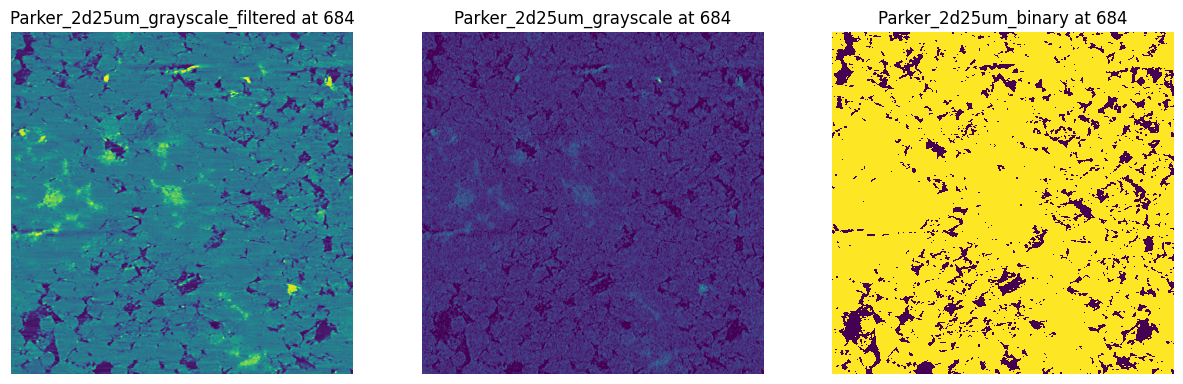

In [ ]:
# Random slices
np.random.seed(0)
idx = np.random.randint(0, 1000)

hx = 5
fig, axes = plt.subplots(1, len(data_names), figsize=(hx*len(data_names),hx))
for i, name in enumerate(data_names):
    data = data_dict[name][:, :, idx]
    axes[i].imshow(data, interpolation='nearest')
    axes[i].set_title(f"{name} at {idx}")
    axes[i].axis('off')

In [8]:
# Here we define the image we are going to work with
selected_data_set = data_names[2]
selected_image = data_dict[selected_data_set][:, :,idx]

/home/pedro2/.local/lib/python3.10/site-packages/sklearn/base.py:1363: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


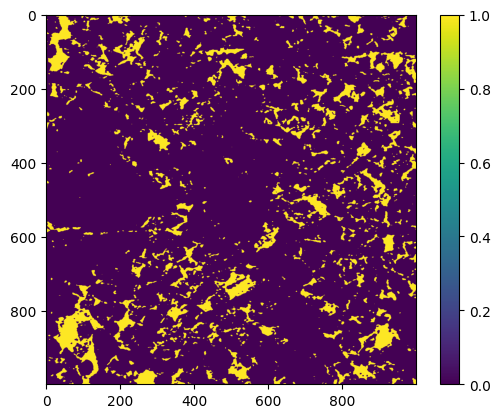

In [9]:

flat = selected_image.reshape(-1,1)
labels = KMeans(n_clusters=4).fit_predict(flat)
training_image_2d = labels.reshape(selected_image.shape)

plt.imshow(training_image_2d)
plt.colorbar()

(array([871818.,      0.,      0., 128182.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

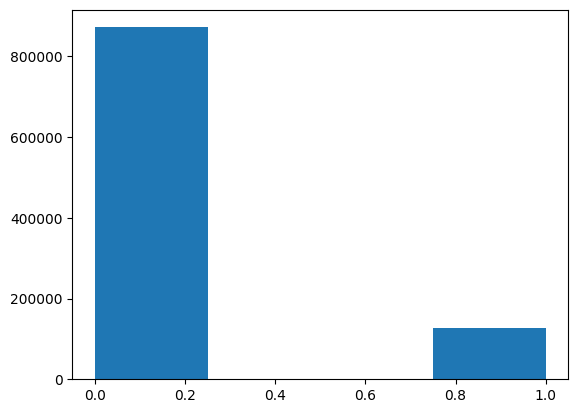

In [10]:
plt.hist(training_image_2d.flatten(), bins=4)

In [ ]:
windown_size = 9 # tamanho da janela
image_size = training_image_2d.shape[0] # tamanho da imagem
pad = (windown_size-1)//2   # idx_min e idx_max no seu código


data_events_without_center = []    # Lista de todos data events registrados
data_event_counts = {} # dict[data_event, dict[valor do centro, quantidade]]
data_events_by_center = {} # dict[(center_coord_x, center_coord_y), data_event]

for y in range(pad, image_size-pad):
    for x in range(pad, image_size-pad):
        patch = training_image_2d[x-pad:x+pad+1, y-pad:y+pad+1] # Pega um quadrado NxN
        center_coords = ((2*x+pad+1 / 2), (2*y+pad+1 / 2))  # Pega as coordenadas do centro
        data_events_by_center[center_coords] = patch    

        center = patch[pad, pad]    # Valor do centro
        patch_without_center = np.delete(patch.flatten(), pad * image_size + pad)    # Remove valor do centro
        data_events_without_center.append((patch_without_center, center))   # Guarda o data event sem centro

        data_event_counts.setdefault(tuple(patch_without_center), {}).setdefault(center, 0)   # Dado um data event sem centro faz a contagem
        data_event_counts[tuple(patch_without_center)][center] += 1   # Da quantidade de centros tipo 0 ou 1

In [12]:
cpdf = {}
for data_event, center_dict in data_event_counts.items():
    # Total de vezes que o data event é registrado
    total = sum(center_dict.values())

    probs = {center_value: quantity/total for center_value, quantity in center_dict.items()}
    
    cpdf[data_event] = probs

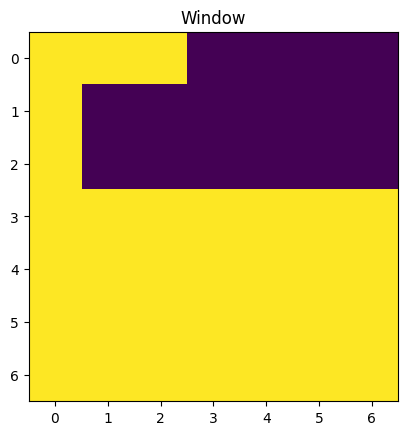

In [ ]:
np.random.seed(0)
l = slice.shape[0]
n = 7
idx_min, idx_max = int((n-1)/2), int(l - (n-1)/2)
i,j = np.random.randint(idx_min, idx_max, size=2)
window_n = seg2d[i - idx_min:i + idx_min + 1, j - idx_min:j + idx_min + 1].copy()
plt.imshow(window_n)
plt.title('Window')